In [2]:
%load_ext autoreload
%autoreload 2

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from src import fonctions

Using TensorFlow backend.


In [3]:
# Chemins du projet
DATA_ROOT = "data/"
MODELS_ROOT = "saved_models/"
TRAINING_PATH = DATA_ROOT + "cifar-100/train"
TESTING_PATH = DATA_ROOT + "cifar-100/test"
CIFAR_100 = DATA_ROOT + "cifar-100"

# Autres paramètres
epochs = 50
img_size = 32

In [5]:
# Convertion des futurs images RBG en niveaux de gris (0 == noir, 255 == blanc)
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory( directory = TRAINING_PATH, target_size = (img_size,img_size), class_mode = "categorical")

test_generator = test_datagen.flow_from_directory( directory = TESTING_PATH, target_size = (img_size,img_size), class_mode = "categorical")

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.


# Création du modèle et entraînement.

In [7]:
# Création d'un modèle séquentiel qui se résume à une pile linéaire de couches
model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(125, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
es_callback = EarlyStopping(monitor='val_loss', patience=3)
entrainement = model.fit_generator(train_generator, epochs = epochs, callbacks=[es_callback], validation_data = test_generator)

score = model.evaluate(train_generator, verbose=0)
print("Test de perte:", score[0])
print("Test de précision:", score[1])
print("")
print("Enregistrement du modèle...")
model.save(MODELS_ROOT + "model_final.h5")
print("Modèle enregistré!")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       56375     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               800100    
Total params: 857,875
Trainable params: 857,875
Non-trainable params: 0
________________________________________________

KeyboardInterrupt: 

# Test du modèle.


Modèle chargé!


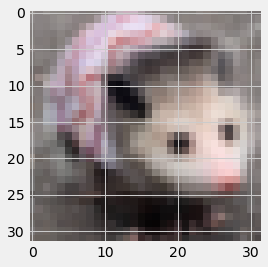


Roulement de tambour...
Prédictions :

possum : 35.37 %
flatfish : 14.98 %
beaver : 13.29 %
crocodile : 5.8 %
streetcar : 3.21 %
girl : 2.85 %
crab : 2.26 %
snake : 2.06 %
seal : 1.97 %
boy : 1.83 %
can : 1.44 %
bowl : 1.43 %
snail : 1.28 %
bear : 1.12 %
mouse : 1.11 %
telephone : 0.96 %
bus : 0.9 %
chimpanzee : 0.85 %
lion : 0.77 %
skunk : 0.72 %
poppy : 0.71 %
worm : 0.68 %
leopard : 0.47 %
cup : 0.39 %
rabbit : 0.33 %
camel : 0.33 %
raccoon : 0.32 %
beetle : 0.28 %
otter : 0.26 %
lamp : 0.25 %
turtle : 0.23 %
cattle : 0.22 %
tank : 0.17 %
tractor : 0.17 %
tiger : 0.11 %
squirrel : 0.09 %
clock : 0.08 %
butterfly : 0.06 %
fox : 0.05 %
spider : 0.05 %
train : 0.04 %
plate : 0.04 %
wolf : 0.04 %
bed : 0.04 %
bee : 0.04 %
hamster : 0.03 %
dolphin : 0.03 %
mushroom : 0.02 %
woman : 0.02 %
elephant : 0.02 %
tulip : 0.02 %
baby : 0.02 %
pickup_truck : 0.02 %
kangaroo : 0.01 %
bicycle : 0.01 %
lizard : 0.01 %
lobster : 0.01 %
apple : 0.01 %
cockroach : 0.01 %
man : 0.01 %
shrew : 0.01 %
ke

In [7]:
# Visualisation de l'image
layer_outputs = [layer.output for layer in model.layers]
test_image = "src\images\opossum_trop_choupi.jpg"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

# Nous testons maintenant notre modèle sur une image (ici un opossum)
fonctions.test_model("saved_models/model_final.h5","src\images\opossum_trop_choupi.jpg", CIFAR_100)

# Détail des layers.

## conv2d_3 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________

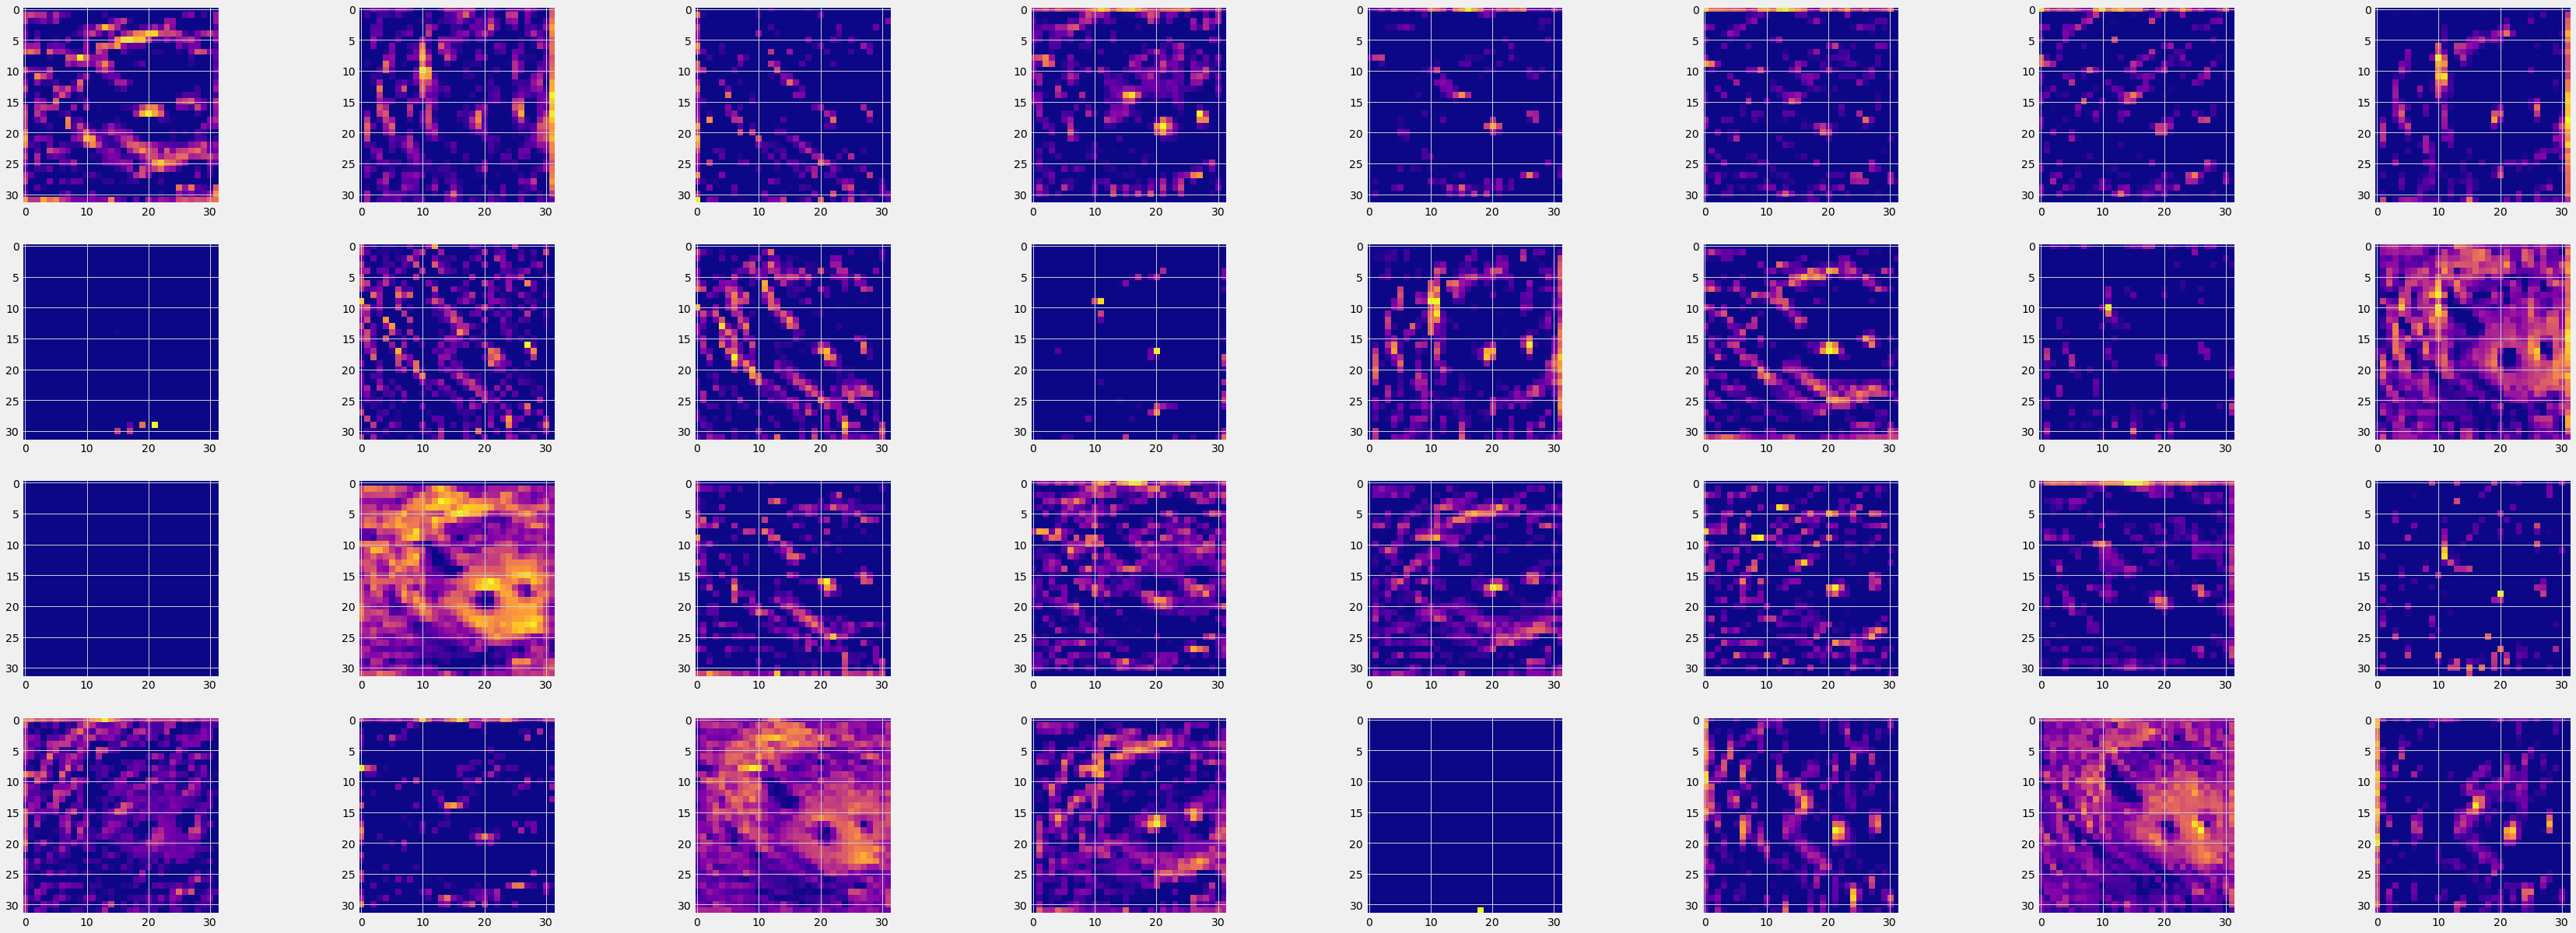

In [8]:
fonctions.display_activation(activations, 8, 4, 0)

## conv2d_4 (Conv2D)            (None, 16, 16, 125)       56375     
_________________________________________________________________

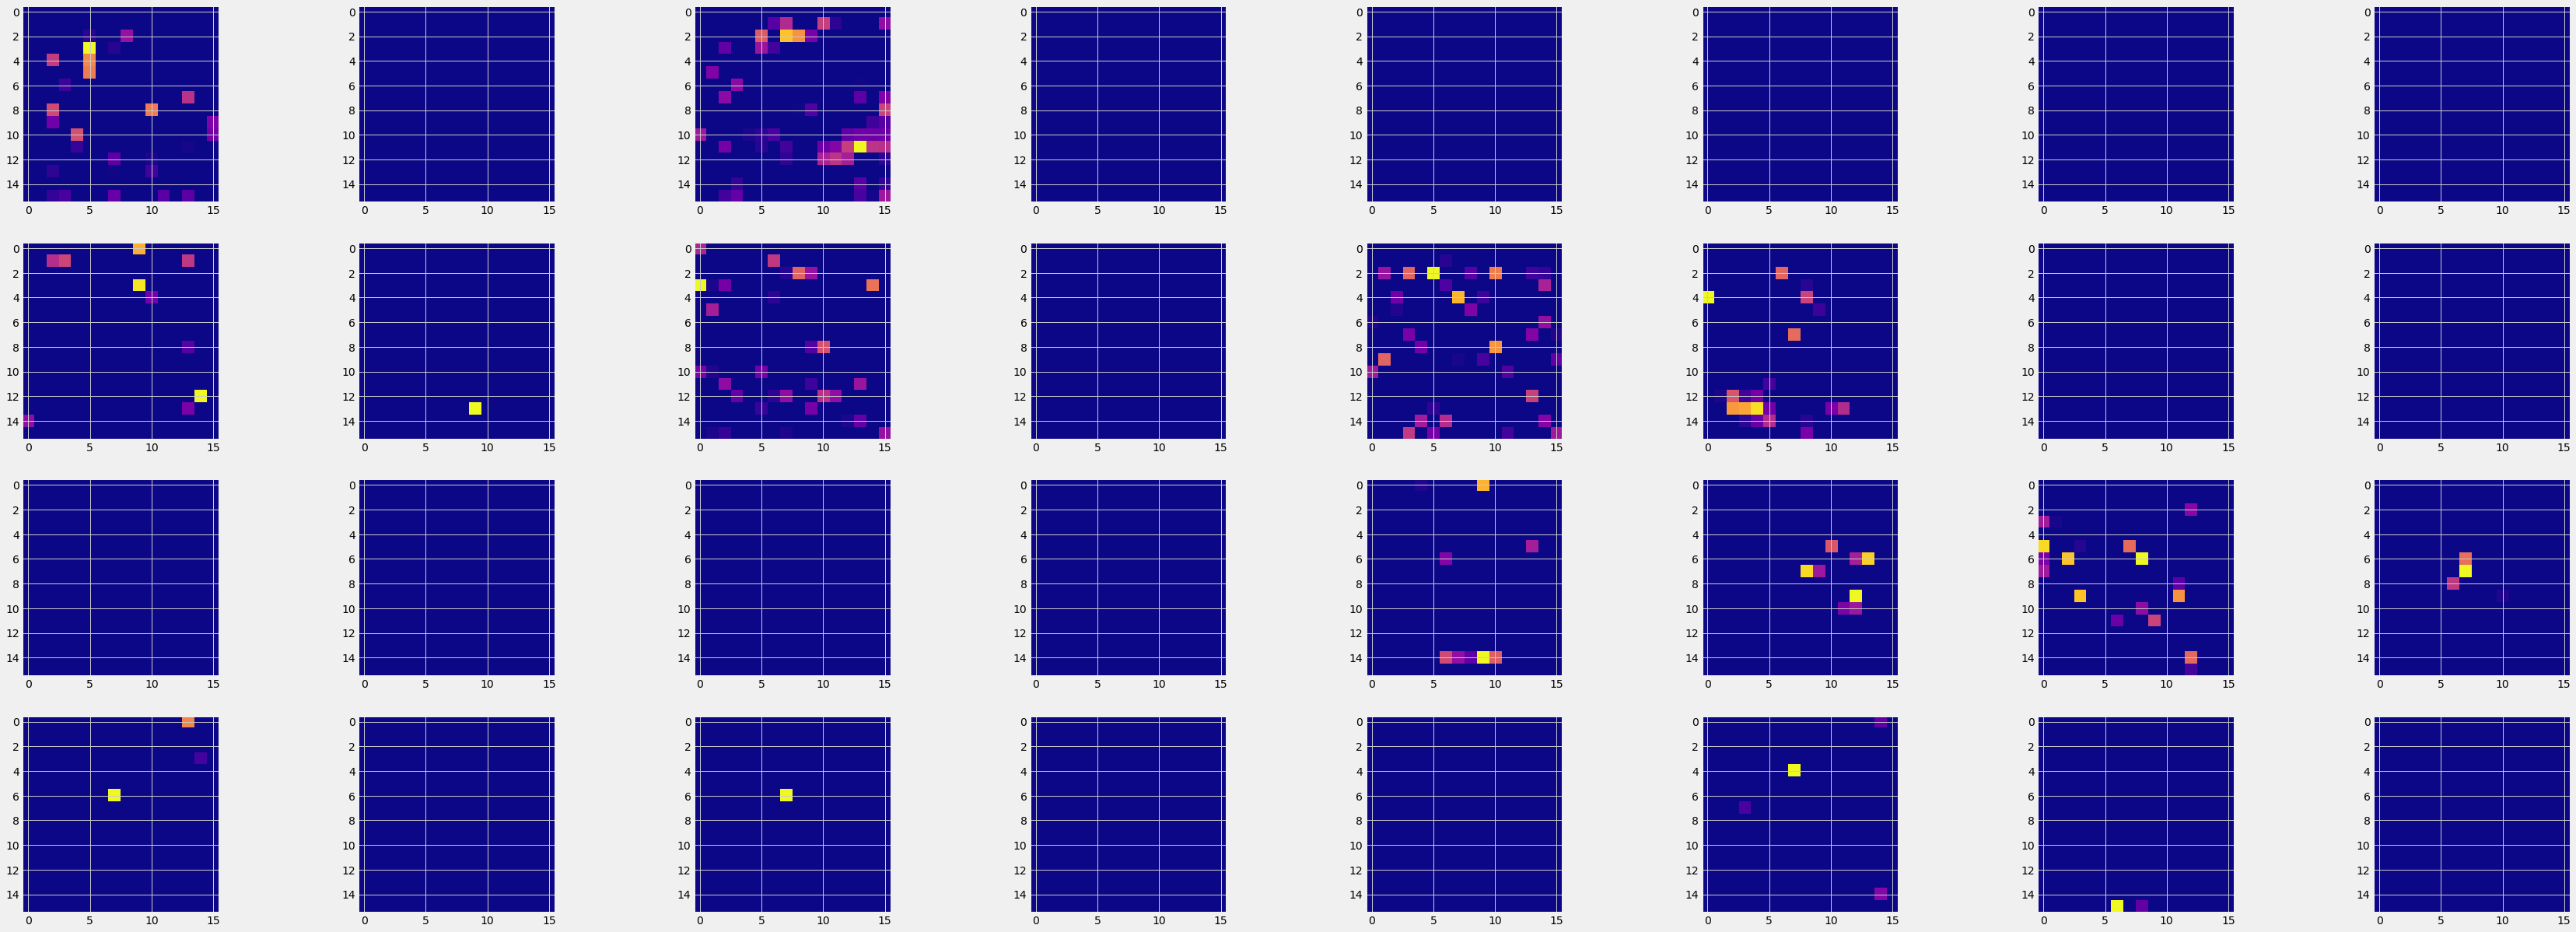

In [9]:
fonctions.display_activation(activations, 8, 4, 1)

## max_pooling2d_2 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________

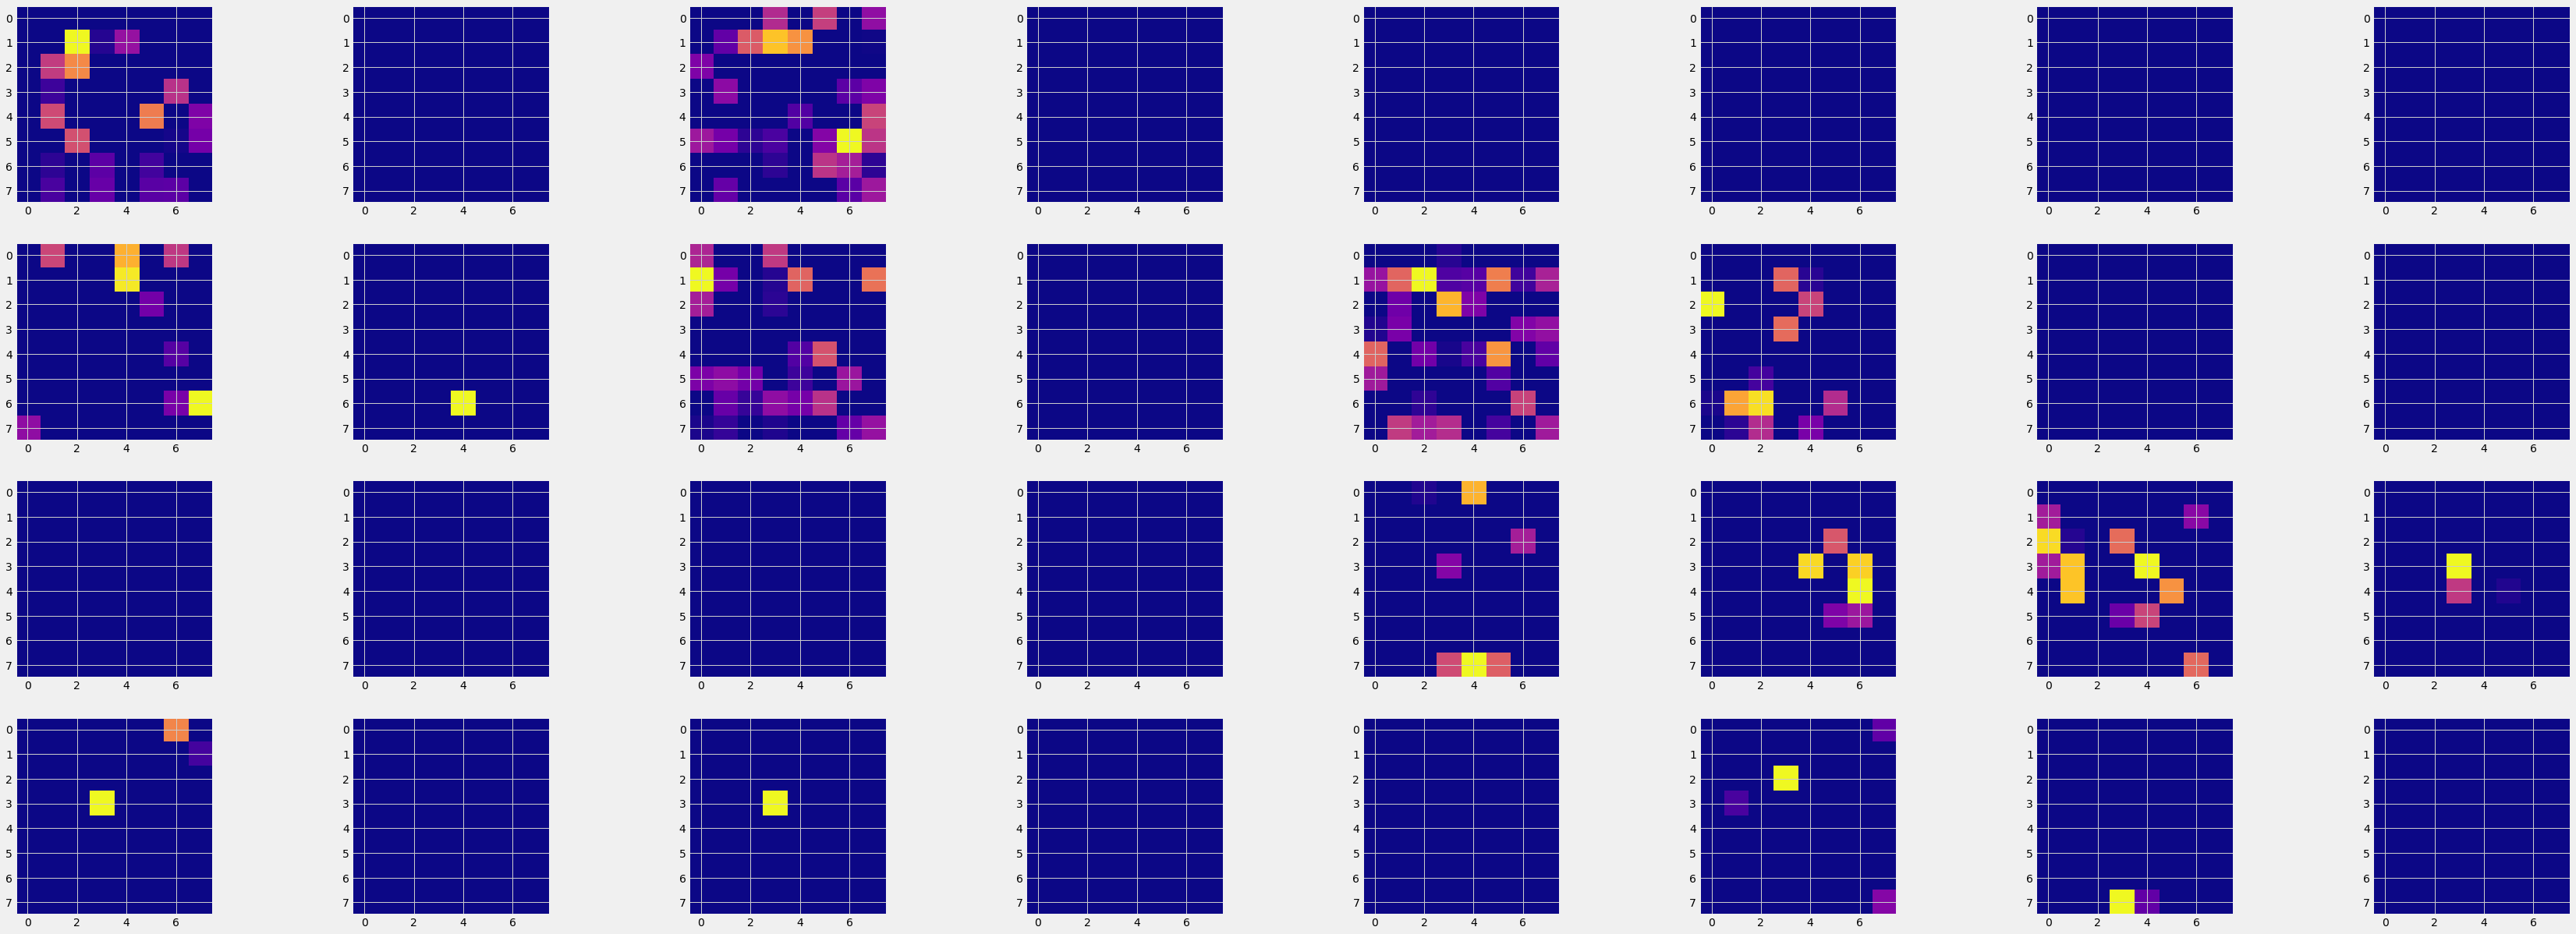

In [10]:
fonctions.display_activation(activations, 8, 4, 2)

## dropout_2 (Dropout)          (None, 8, 8, 125)         0         
_________________________________________________________________

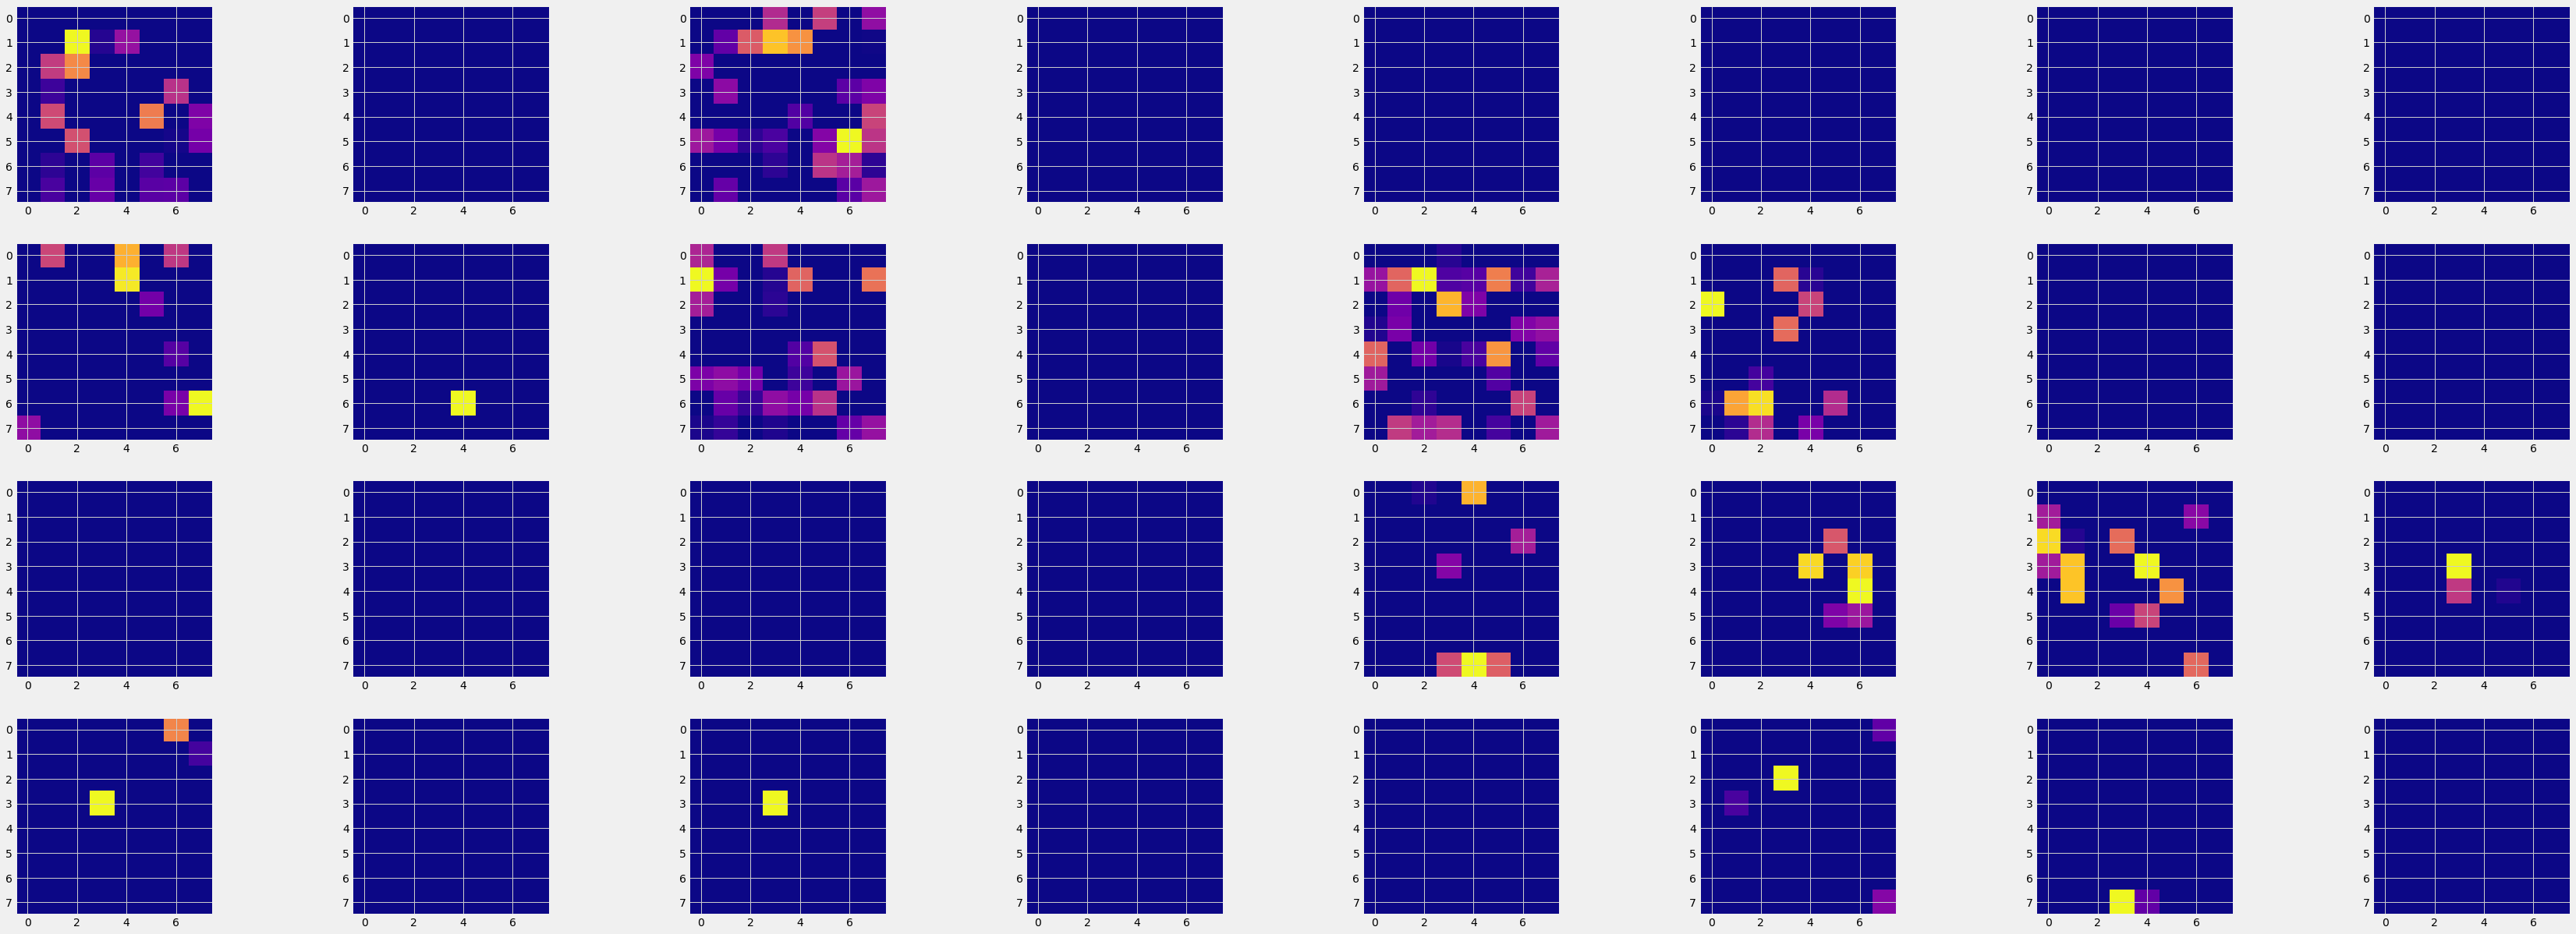

In [11]:
fonctions.display_activation(activations, 8, 4, 3)

## flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________

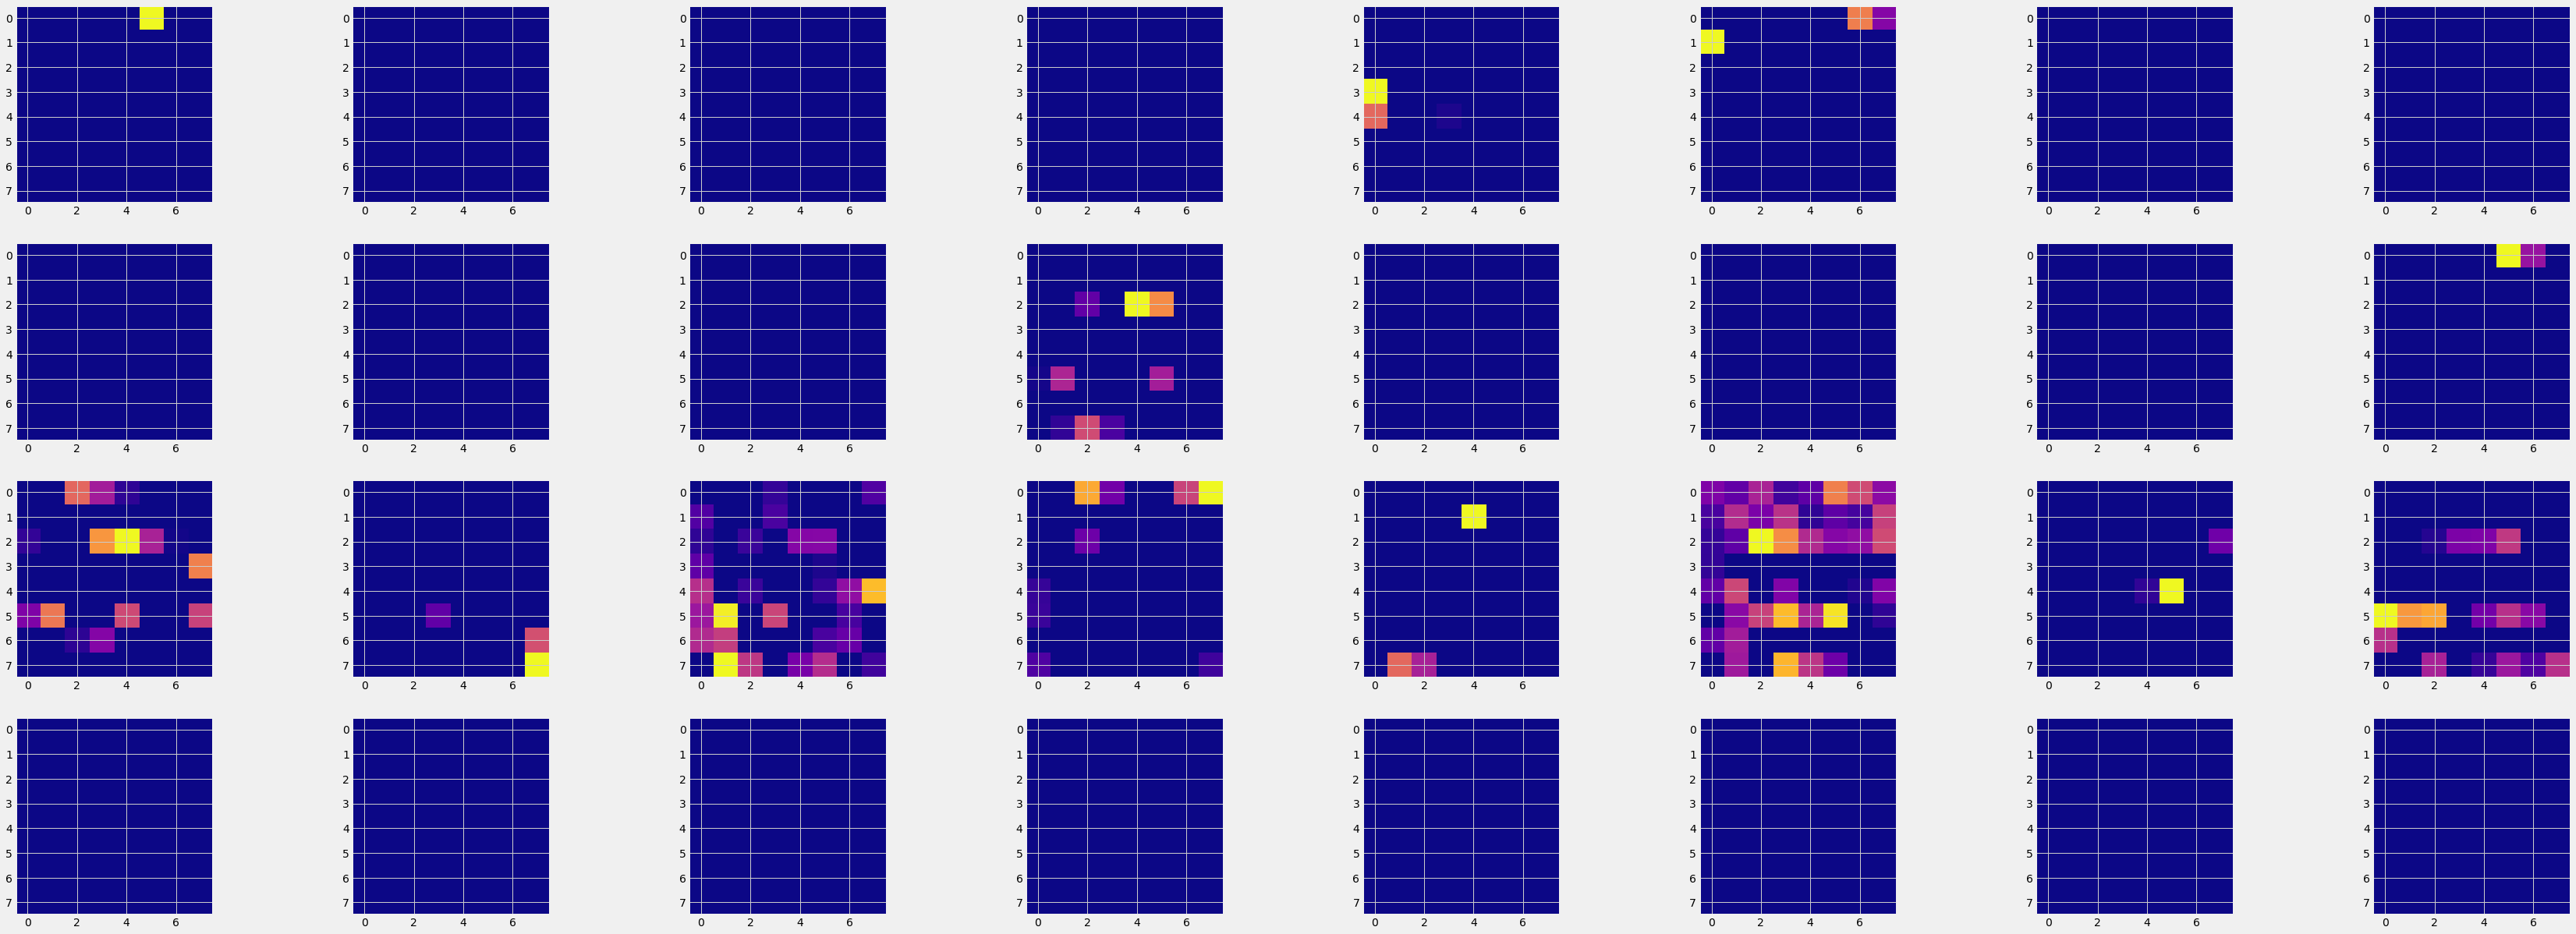

In [12]:
fonctions.display_activation(activations, 8, 4, 5)

## dense_2 (Dense)              (None, 100)               800100    
===============================================================

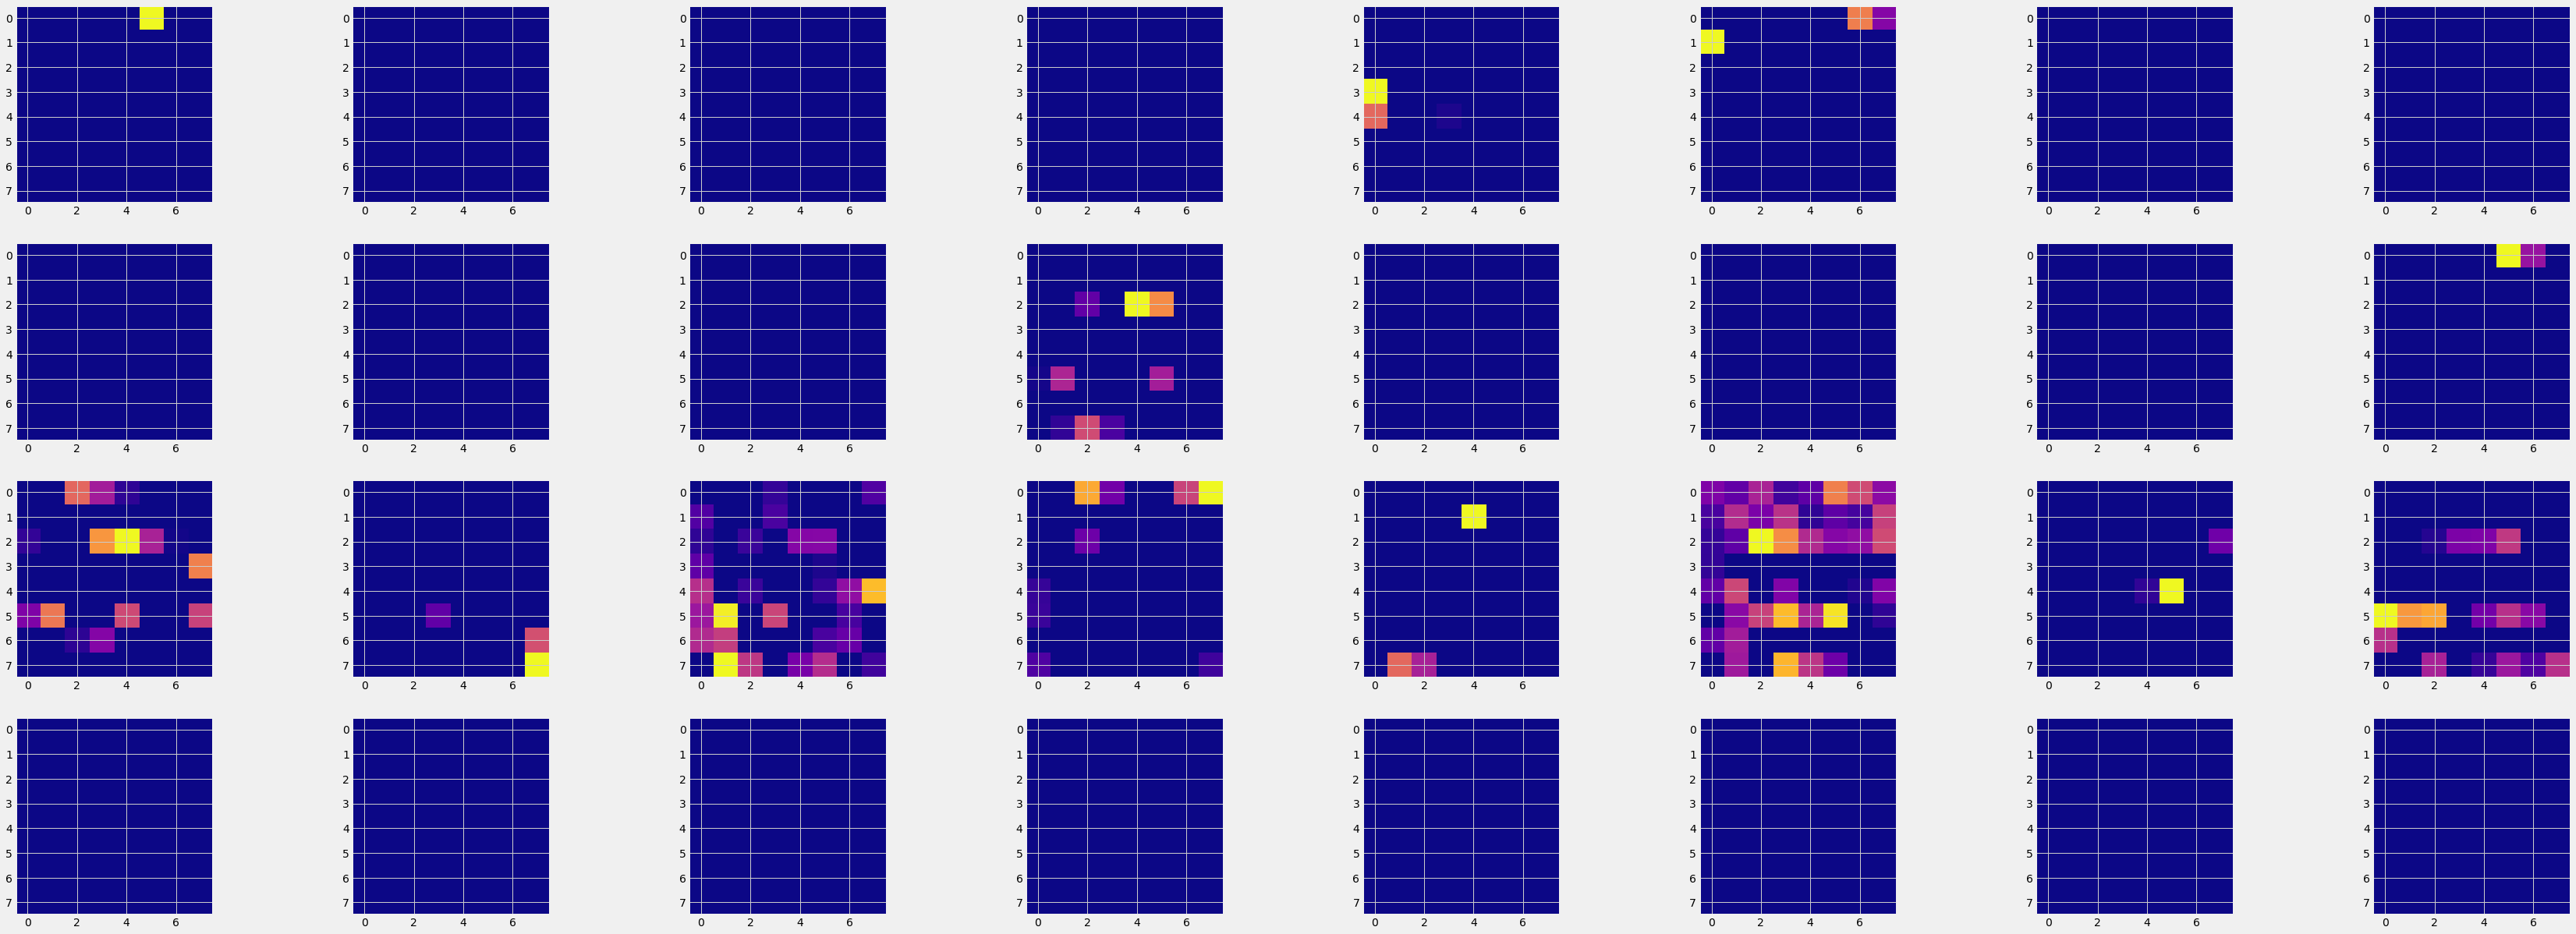

In [13]:
fonctions.display_activation(activations, 8, 4, 6)

# 2eme prédiction


Modèle chargé!


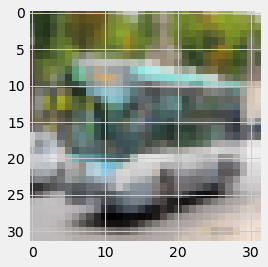


Roulement de tambour...
Prédictions :

bus : 72.51 %
pickup_truck : 9.83 %
lawn_mower : 7.11 %
streetcar : 5.47 %
tractor : 3.92 %
train : 0.65 %
motorcycle : 0.25 %
television : 0.09 %
bed : 0.08 %
crocodile : 0.03 %
tiger : 0.02 %
tank : 0.02 %
raccoon : 0.01 %
can : 0.01 %
bowl : 0.0 %
bridge : 0.0 %
snake : 0.0 %
fox : 0.0 %
butterfly : 0.0 %
table : 0.0 %
turtle : 0.0 %
telephone : 0.0 %
squirrel : 0.0 %
flatfish : 0.0 %
otter : 0.0 %
chair : 0.0 %
house : 0.0 %
crab : 0.0 %
bicycle : 0.0 %
beetle : 0.0 %
cup : 0.0 %
beaver : 0.0 %
trout : 0.0 %
lobster : 0.0 %
keyboard : 0.0 %
rabbit : 0.0 %
wolf : 0.0 %
lizard : 0.0 %
couch : 0.0 %
seal : 0.0 %
caterpillar : 0.0 %
shrew : 0.0 %
dinosaur : 0.0 %
chimpanzee : 0.0 %
pine_tree : 0.0 %
clock : 0.0 %
palm_tree : 0.0 %
worm : 0.0 %
rose : 0.0 %
whale : 0.0 %
baby : 0.0 %
skunk : 0.0 %
man : 0.0 %
bear : 0.0 %
possum : 0.0 %
mouse : 0.0 %
boy : 0.0 %
aquarium_fish : 0.0 %
lamp : 0.0 %
mushroom : 0.0 %
leopard : 0.0 %
kangaroo : 0.0 %
b

In [4]:
# Nous testons maintenant notre modèle sur une image 
fonctions.test_model("saved_models/model_final.h5","src/images/bus.jpg", CIFAR_100)

# 3ème prédiction


Modèle chargé!


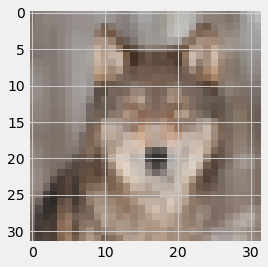


Roulement de tambour...
Prédictions :

wolf : 99.6 %
squirrel : 0.08 %
kangaroo : 0.06 %
lion : 0.04 %
rabbit : 0.03 %
snake : 0.03 %
tiger : 0.02 %
fox : 0.01 %
raccoon : 0.01 %
possum : 0.01 %
lizard : 0.01 %
camel : 0.01 %
woman : 0.01 %
cup : 0.01 %
shrew : 0.01 %
leopard : 0.01 %
baby : 0.0 %
hamster : 0.0 %
mushroom : 0.0 %
otter : 0.0 %
table : 0.0 %
man : 0.0 %
flatfish : 0.0 %
mouse : 0.0 %
tractor : 0.0 %
snail : 0.0 %
tank : 0.0 %
girl : 0.0 %
beaver : 0.0 %
ray : 0.0 %
trout : 0.0 %
can : 0.0 %
crab : 0.0 %
turtle : 0.0 %
clock : 0.0 %
sweet_pepper : 0.0 %
keyboard : 0.0 %
butterfly : 0.0 %
bear : 0.0 %
crocodile : 0.0 %
beetle : 0.0 %
porcupine : 0.0 %
castle : 0.0 %
worm : 0.0 %
lobster : 0.0 %
rose : 0.0 %
seal : 0.0 %
bee : 0.0 %
bowl : 0.0 %
boy : 0.0 %
plate : 0.0 %
dolphin : 0.0 %
apple : 0.0 %
dinosaur : 0.0 %
elephant : 0.0 %
cattle : 0.0 %
poppy : 0.0 %
orchid : 0.0 %
streetcar : 0.0 %
bed : 0.0 %
bridge : 0.0 %
chimpanzee : 0.0 %
caterpillar : 0.0 %
train : 0.0 

In [15]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src\images\loup_qui_tue.jpg", CIFAR_100)


Modèle chargé!


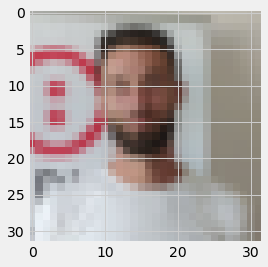


Roulement de tambour...
Prédictions :

boy : 41.31 %
baby : 36.16 %
snail : 4.14 %
cattle : 3.27 %
man : 2.54 %
couch : 2.2 %
girl : 1.9 %
flatfish : 1.56 %
crab : 1.47 %
mouse : 0.92 %
cockroach : 0.89 %
snake : 0.66 %
table : 0.37 %
television : 0.32 %
beaver : 0.3 %
possum : 0.29 %
butterfly : 0.23 %
shrew : 0.2 %
sweet_pepper : 0.19 %
lizard : 0.16 %
dinosaur : 0.1 %
woman : 0.09 %
aquarium_fish : 0.09 %
bee : 0.07 %
caterpillar : 0.07 %
squirrel : 0.07 %
hamster : 0.04 %
tulip : 0.04 %
beetle : 0.04 %
otter : 0.04 %
lobster : 0.03 %
tiger : 0.03 %
mushroom : 0.02 %
spider : 0.02 %
bottle : 0.01 %
seal : 0.01 %
rabbit : 0.01 %
pear : 0.01 %
can : 0.01 %
orchid : 0.01 %
camel : 0.01 %
bear : 0.01 %
orange : 0.01 %
elephant : 0.01 %
poppy : 0.01 %
ray : 0.01 %
rose : 0.0 %
house : 0.0 %
bed : 0.0 %
shark : 0.0 %
palm_tree : 0.0 %
streetcar : 0.0 %
turtle : 0.0 %
chimpanzee : 0.0 %
fox : 0.0 %
keyboard : 0.0 %
bowl : 0.0 %
train : 0.0 %
worm : 0.0 %
castle : 0.0 %
raccoon : 0.0 %
tel

In [26]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src\images\homme_mature.jpg", CIFAR_100)


Modèle chargé!


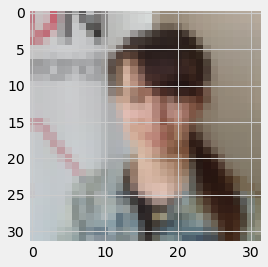


Roulement de tambour...
Prédictions :

woman : 81.91 %
man : 12.75 %
boy : 0.91 %
squirrel : 0.73 %
raccoon : 0.65 %
girl : 0.54 %
bear : 0.5 %
baby : 0.48 %
kangaroo : 0.33 %
otter : 0.15 %
seal : 0.13 %
mouse : 0.13 %
tiger : 0.1 %
turtle : 0.08 %
possum : 0.08 %
worm : 0.07 %
rabbit : 0.06 %
caterpillar : 0.06 %
wolf : 0.05 %
mushroom : 0.04 %
lizard : 0.03 %
cattle : 0.02 %
leopard : 0.02 %
table : 0.02 %
beetle : 0.02 %
dinosaur : 0.02 %
orchid : 0.01 %
snail : 0.01 %
fox : 0.01 %
camel : 0.01 %
hamster : 0.01 %
shrew : 0.01 %
cloud : 0.01 %
flatfish : 0.01 %
beaver : 0.01 %
can : 0.01 %
lion : 0.0 %
lamp : 0.0 %
pear : 0.0 %
crab : 0.0 %
spider : 0.0 %
keyboard : 0.0 %
lobster : 0.0 %
cockroach : 0.0 %
cup : 0.0 %
elephant : 0.0 %
orange : 0.0 %
castle : 0.0 %
bottle : 0.0 %
clock : 0.0 %
trout : 0.0 %
tulip : 0.0 %
television : 0.0 %
rose : 0.0 %
snake : 0.0 %
chimpanzee : 0.0 %
palm_tree : 0.0 %
house : 0.0 %
telephone : 0.0 %
shark : 0.0 %
skyscraper : 0.0 %
bed : 0.0 %
apple

In [27]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src/images/audrey_la_bgette.jpg", CIFAR_100)


Modèle chargé!


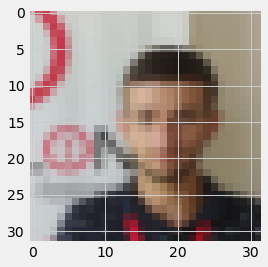


Roulement de tambour...
Prédictions :

girl : 93.11 %
man : 2.98 %
bottle : 1.06 %
possum : 0.58 %
snail : 0.44 %
turtle : 0.35 %
boy : 0.3 %
woman : 0.19 %
hamster : 0.14 %
kangaroo : 0.12 %
crab : 0.11 %
mouse : 0.1 %
fox : 0.07 %
pear : 0.06 %
flatfish : 0.05 %
lizard : 0.04 %
ray : 0.04 %
lamp : 0.03 %
raccoon : 0.03 %
seal : 0.02 %
wolf : 0.02 %
streetcar : 0.02 %
butterfly : 0.02 %
orchid : 0.01 %
bee : 0.01 %
cup : 0.01 %
leopard : 0.01 %
baby : 0.01 %
tractor : 0.01 %
bear : 0.01 %
chimpanzee : 0.01 %
tiger : 0.01 %
shrew : 0.0 %
clock : 0.0 %
camel : 0.0 %
dinosaur : 0.0 %
train : 0.0 %
caterpillar : 0.0 %
rabbit : 0.0 %
table : 0.0 %
lobster : 0.0 %
tank : 0.0 %
bowl : 0.0 %
beaver : 0.0 %
television : 0.0 %
otter : 0.0 %
telephone : 0.0 %
keyboard : 0.0 %
cattle : 0.0 %
crocodile : 0.0 %
snake : 0.0 %
worm : 0.0 %
couch : 0.0 %
can : 0.0 %
dolphin : 0.0 %
bicycle : 0.0 %
bridge : 0.0 %
house : 0.0 %
forest : 0.0 %
squirrel : 0.0 %
aquarium_fish : 0.0 %
rose : 0.0 %
elephant

In [33]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src\images\dja-carre.JPG", CIFAR_100)


Modèle chargé!


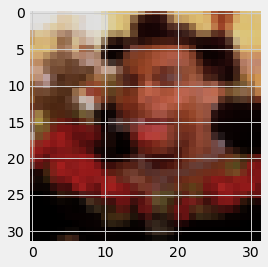


Roulement de tambour...
Prédictions :

man : 30.93 %
baby : 16.64 %
boy : 12.64 %
woman : 11.3 %
girl : 10.84 %
crab : 6.31 %
lobster : 4.33 %
couch : 3.79 %
chimpanzee : 0.62 %
train : 0.53 %
can : 0.33 %
table : 0.27 %
bowl : 0.27 %
tulip : 0.26 %
flatfish : 0.22 %
rose : 0.11 %
mouse : 0.08 %
turtle : 0.08 %
bed : 0.07 %
lamp : 0.06 %
streetcar : 0.06 %
pear : 0.04 %
beaver : 0.04 %
clock : 0.03 %
sweet_pepper : 0.02 %
apple : 0.02 %
worm : 0.02 %
snake : 0.01 %
cup : 0.01 %
cattle : 0.01 %
camel : 0.01 %
telephone : 0.01 %
maple_tree : 0.01 %
bee : 0.01 %
poppy : 0.01 %
trout : 0.01 %
butterfly : 0.0 %
caterpillar : 0.0 %
keyboard : 0.0 %
pine_tree : 0.0 %
tractor : 0.0 %
possum : 0.0 %
dinosaur : 0.0 %
forest : 0.0 %
television : 0.0 %
shrew : 0.0 %
beetle : 0.0 %
aquarium_fish : 0.0 %
tiger : 0.0 %
bridge : 0.0 %
otter : 0.0 %
bottle : 0.0 %
wardrobe : 0.0 %
bus : 0.0 %
mushroom : 0.0 %
castle : 0.0 %
orchid : 0.0 %
house : 0.0 %
snail : 0.0 %
bear : 0.0 %
hamster : 0.0 %
sunflo

In [29]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src/images/rubyyyyyyyy.png", CIFAR_100)


Modèle chargé!


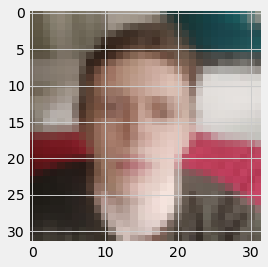


Roulement de tambour...
Prédictions :

baby : 75.9 %
hamster : 10.93 %
girl : 8.93 %
boy : 1.12 %
apple : 0.61 %
elephant : 0.53 %
lion : 0.4 %
woman : 0.34 %
orange : 0.24 %
man : 0.16 %
castle : 0.16 %
mushroom : 0.11 %
bed : 0.07 %
fox : 0.06 %
bus : 0.06 %
tiger : 0.05 %
snake : 0.05 %
beaver : 0.03 %
pickup_truck : 0.03 %
flatfish : 0.03 %
cattle : 0.02 %
aquarium_fish : 0.02 %
orchid : 0.02 %
pear : 0.02 %
bear : 0.01 %
plate : 0.01 %
can : 0.01 %
wolf : 0.01 %
tulip : 0.01 %
mouse : 0.01 %
table : 0.01 %
rabbit : 0.0 %
seal : 0.0 %
bridge : 0.0 %
rose : 0.0 %
squirrel : 0.0 %
porcupine : 0.0 %
worm : 0.0 %
streetcar : 0.0 %
trout : 0.0 %
wardrobe : 0.0 %
bottle : 0.0 %
chimpanzee : 0.0 %
possum : 0.0 %
snail : 0.0 %
keyboard : 0.0 %
train : 0.0 %
raccoon : 0.0 %
bowl : 0.0 %
lobster : 0.0 %
rocket : 0.0 %
couch : 0.0 %
otter : 0.0 %
kangaroo : 0.0 %
lizard : 0.0 %
caterpillar : 0.0 %
dinosaur : 0.0 %
lamp : 0.0 %
cup : 0.0 %
clock : 0.0 %
television : 0.0 %
poppy : 0.0 %
forest

In [31]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src\images\plus_souriant_en_vrai.JPG", CIFAR_100)


Modèle chargé!


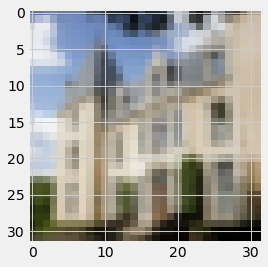


Roulement de tambour...
Prédictions :

castle : 53.55 %
elephant : 13.16 %
tank : 8.34 %
house : 5.79 %
skyscraper : 5.73 %
wolf : 3.28 %
leopard : 3.0 %
kangaroo : 0.97 %
cattle : 0.95 %
dinosaur : 0.9 %
camel : 0.83 %
palm_tree : 0.68 %
orchid : 0.64 %
bridge : 0.52 %
table : 0.31 %
forest : 0.25 %
shrew : 0.19 %
bicycle : 0.13 %
bus : 0.12 %
mouse : 0.11 %
raccoon : 0.09 %
bear : 0.08 %
rocket : 0.06 %
spider : 0.05 %
caterpillar : 0.05 %
can : 0.03 %
bee : 0.02 %
tractor : 0.02 %
wardrobe : 0.02 %
bottle : 0.01 %
seal : 0.01 %
butterfly : 0.01 %
possum : 0.01 %
couch : 0.01 %
fox : 0.01 %
lizard : 0.01 %
television : 0.01 %
keyboard : 0.01 %
pickup_truck : 0.01 %
mushroom : 0.0 %
woman : 0.0 %
streetcar : 0.0 %
tiger : 0.0 %
flatfish : 0.0 %
shark : 0.0 %
lobster : 0.0 %
willow_tree : 0.0 %
girl : 0.0 %
snake : 0.0 %
motorcycle : 0.0 %
otter : 0.0 %
rabbit : 0.0 %
train : 0.0 %
crab : 0.0 %
telephone : 0.0 %
turtle : 0.0 %
squirrel : 0.0 %
tulip : 0.0 %
porcupine : 0.0 %
worm : 0.

In [35]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src/images/braincube.JPG", CIFAR_100)


Modèle chargé!


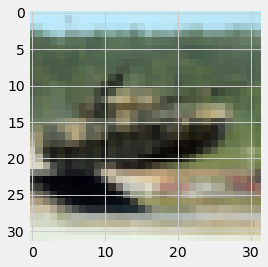


Roulement de tambour...
Prédictions :

tank : 50.02 %
train : 42.36 %
tractor : 3.55 %
streetcar : 1.76 %
maple_tree : 0.72 %
pickup_truck : 0.54 %
oak_tree : 0.25 %
pine_tree : 0.17 %
bus : 0.12 %
otter : 0.11 %
raccoon : 0.08 %
seal : 0.06 %
house : 0.05 %
crocodile : 0.04 %
bridge : 0.03 %
beaver : 0.02 %
willow_tree : 0.01 %
cattle : 0.01 %
fox : 0.01 %
turtle : 0.01 %
road : 0.01 %
leopard : 0.01 %
dinosaur : 0.01 %
flatfish : 0.01 %
couch : 0.0 %
bear : 0.0 %
lawn_mower : 0.0 %
palm_tree : 0.0 %
shark : 0.0 %
television : 0.0 %
snail : 0.0 %
possum : 0.0 %
skunk : 0.0 %
motorcycle : 0.0 %
lizard : 0.0 %
squirrel : 0.0 %
chimpanzee : 0.0 %
forest : 0.0 %
can : 0.0 %
sunflower : 0.0 %
elephant : 0.0 %
bicycle : 0.0 %
woman : 0.0 %
cup : 0.0 %
man : 0.0 %
dolphin : 0.0 %
bowl : 0.0 %
tiger : 0.0 %
castle : 0.0 %
snake : 0.0 %
camel : 0.0 %
lamp : 0.0 %
telephone : 0.0 %
lobster : 0.0 %
keyboard : 0.0 %
bottle : 0.0 %
caterpillar : 0.0 %
mushroom : 0.0 %
lion : 0.0 %
rabbit : 0.0 %


In [36]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_final.h5","src/images/tank_qui_tangue.JPG", CIFAR_100)